## Final Project Submission

Please fill out:
* Student name: Tia Plagata
* Student pace: full time
* Scheduled project review date/time: 10/19 10am EST
* Instructor name: Rafael Carrasco
* Blog post URL:

# EDA #
**Outline**
* Stakeholder(s): Real-estate company working on an app feature that will estimate the price of your home.
* Q1: What is the effect of zipcode on home price? 
* Q2: What is the impact of home and lot square footage on home price? What is the average price per square foot for different zipcodes?
* Q3: What is the effect of population density on home price?

## Import Data & Explore

In [14]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")
palette = "ch:r=-.2,d=.3_r"
import folium
import plotly.express as px

In [15]:
df = pd.read_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/dsc-phase-2-project-online/data/kc_house_data_cleaned.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
df['date'].sort_values()

9546     2014-05-02
8935     2014-05-02
12704    2014-05-02
9968     2014-05-02
10711    2014-05-02
            ...    
14710    2015-05-14
18040    2015-05-14
6726     2015-05-14
5247     2015-05-15
12156    2015-05-24
Name: date, Length: 20057, dtype: object

In [17]:
df['yr_built'].value_counts().sort_values()

1934     19
1935     22
1933     22
1902     24
1901     28
       ... 
2006    397
2004    399
1977    400
2005    415
2014    491
Name: yr_built, Length: 116, dtype: int64

In [18]:
print(df.groupby('waterfront')['price'].count())
print(df.groupby('waterfront')['price'].mean())

waterfront
0.0    20007
1.0       50
Name: price, dtype: int64
waterfront
0.0    467899.981656
1.0    671667.000000
Name: price, dtype: float64


In [19]:
print(df.groupby('condition')['price'].count())
print(df.groupby('condition')['price'].mean())

condition
1       26
2      164
3    13025
4     5326
5     1516
Name: price, dtype: int64
condition
1    316613.461538
2    315084.689024
3    471077.427946
4    457666.392227
5    502399.564644
Name: price, dtype: float64


## Stakeholder(s)

### A real-estate company is working on an app feature, which will predict the price of your home in case you are looking to sell it.

**Key Stakeholders**
* Real-estate company app product manager
* Real-estate company board of directors
* Marketing department who may want to integrate the feature into their email campaigns or other promotions
* App users, such as homeowners currently looking to sell and homeowners interested in selling their home in the near/distant future

## Question 1: What is the effect of zipcode on home price? Which zipcode has the highest home prices? Further exploration: is highest-priced zipcode mostly waterfront property?

In [20]:
# What are the unique zip codes?
print(df['zipcode'].nunique())
df['zipcode'].unique()

70


array([98178, 98125, 98028, 98136, 98074, 98003, 98146, 98038, 98007,
       98115, 98107, 98126, 98019, 98103, 98002, 98133, 98092, 98030,
       98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166,
       98053, 98023, 98148, 98105, 98042, 98008, 98059, 98122, 98144,
       98004, 98034, 98075, 98116, 98010, 98118, 98040, 98032, 98045,
       98102, 98077, 98198, 98108, 98168, 98177, 98029, 98006, 98109,
       98022, 98033, 98155, 98024, 98011, 98031, 98106, 98070, 98199,
       98072, 98188, 98065, 98005, 98014, 98055, 98039])

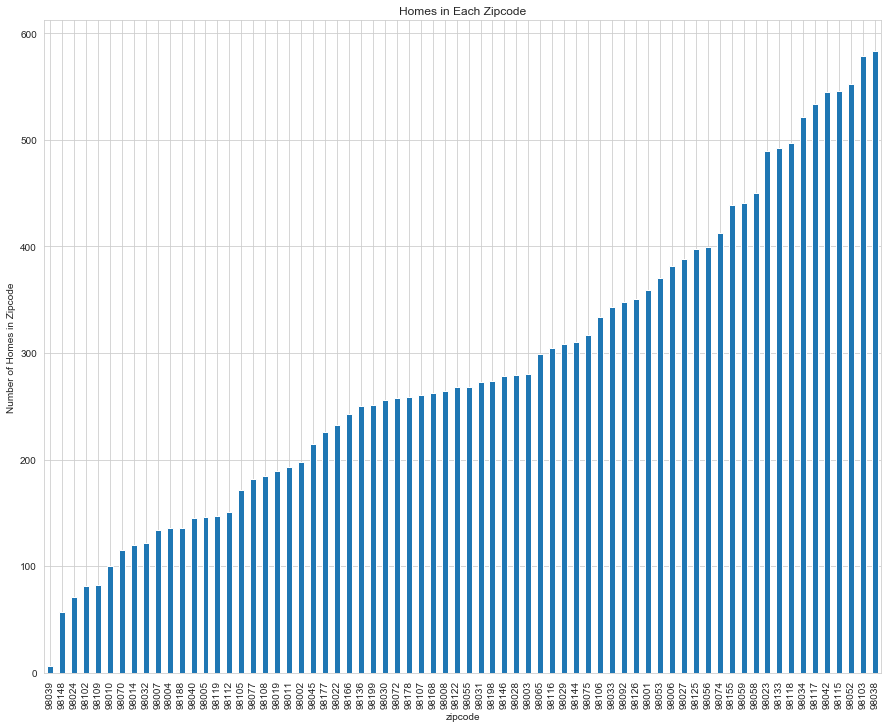

In [21]:
# In which zipcodes are the majority of the homes in our dataset?
fig = plt.figure(figsize=(15,12))
df.groupby('zipcode')['price'].count().sort_values().plot(kind='bar')
plt.ylabel('Number of Homes in Zipcode')
plt.title('Homes in Each Zipcode')
plt.show()

In [22]:
# Let's just look at the top 15 zipcodes with the highest mean home prices
highest_price_zipcode = pd.DataFrame(df.groupby('zipcode')['price']
                                     .agg('mean')
                                     .sort_values(ascending=False)
                                     .head(15))
highest_price_zipcode = highest_price_zipcode.reset_index()

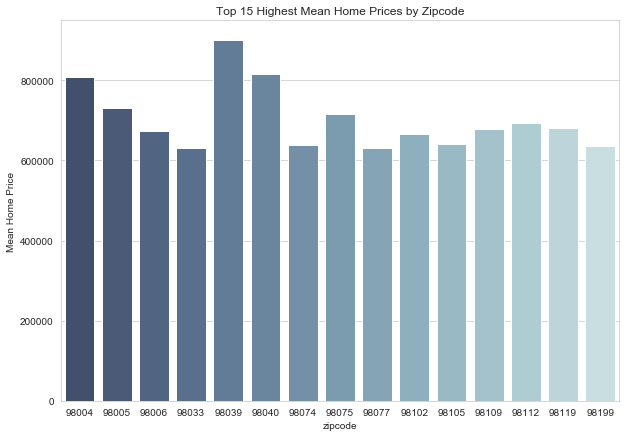

In [23]:
# Plot them
fig = plt.figure(figsize=(10,7))
x = highest_price_zipcode.zipcode
y = highest_price_zipcode.price
sns.barplot(x=x, y=y, palette=palette)
plt.title('Top 15 Highest Mean Home Prices by Zipcode')
plt.ylim(0, 950000)
plt.ylabel('Mean Home Price')
plt.show()

In [24]:
# Which zipcodes have homes with lowest mean prices?
lowest_price_zipcode = pd.DataFrame(df.groupby('zipcode')['price']
                                     .mean()
                                     .sort_values(ascending=True)
                                     .head(15))
lowest_price_zipcode = lowest_price_zipcode.reset_index()

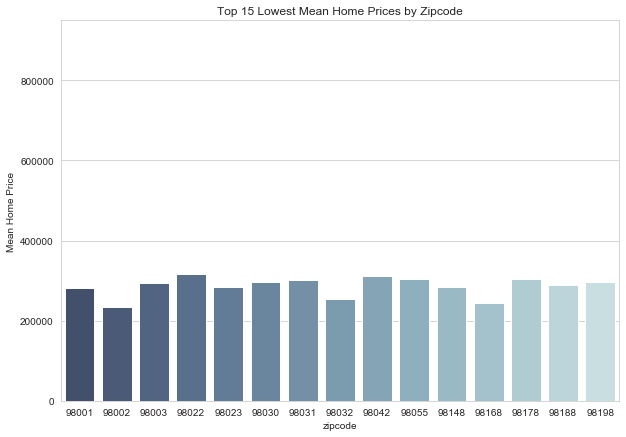

In [25]:
# Plot them
fig = plt.figure(figsize=(10,7))
x1 = lowest_price_zipcode.zipcode
y1 = lowest_price_zipcode.price
sns.barplot(x=x1, y=y1, palette=palette)
plt.title('Top 15 Lowest Mean Home Prices by Zipcode')
plt.ylim(0, 950000)
plt.ylabel('Mean Home Price')
plt.show()

In [26]:
# Of our top 15 highest mean-price zipcodes, which of them are waterfront?
waterfront_zip = df.groupby(['waterfront', 'zipcode']).agg(mean_price =("price",'mean'))
waterfront_zip = waterfront_zip.reset_index()

In [27]:
waterfront_zip = waterfront_zip.loc[waterfront_zip['zipcode'].isin(x)]

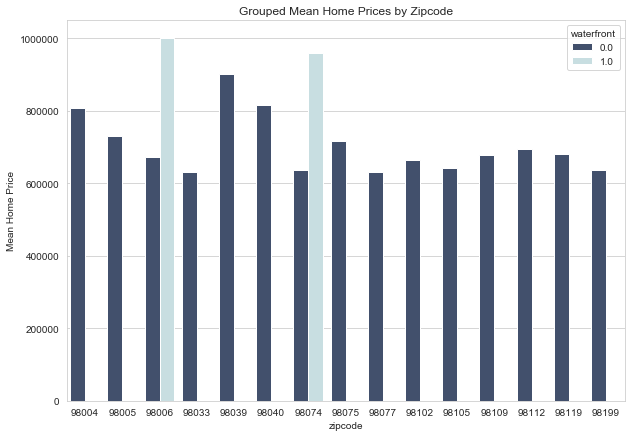

In [28]:
# Only 2 of those zipcodes have waterfront homes
fig = plt.figure(figsize=(10,7))
sns.barplot(x='zipcode', y='mean_price',
            data=waterfront_zip,
            hue='waterfront',
            palette=palette)
plt.title('Grouped Mean Home Prices by Zipcode')
plt.ylabel('Mean Home Price')
plt.show()

In [29]:
# Are any of the homes in the lowest-priced zipcodes waterfront?
waterfront_zip2 = waterfront_zip.loc[waterfront_zip['zipcode'].isin(x1)]
waterfront_zip2
# No

,waterfront,zipcode,mean_price


In [30]:
# Let's look at all waterfront homes and see where the highest mean prices are located
waterfront_df = df.loc[df['waterfront'] == 1]

In [31]:
waterfront_zipcode = pd.DataFrame(waterfront_df.groupby('zipcode')['price']
                                     .mean()
                                     .sort_values(ascending=False))
waterfront_zipcode = waterfront_zipcode.reset_index()

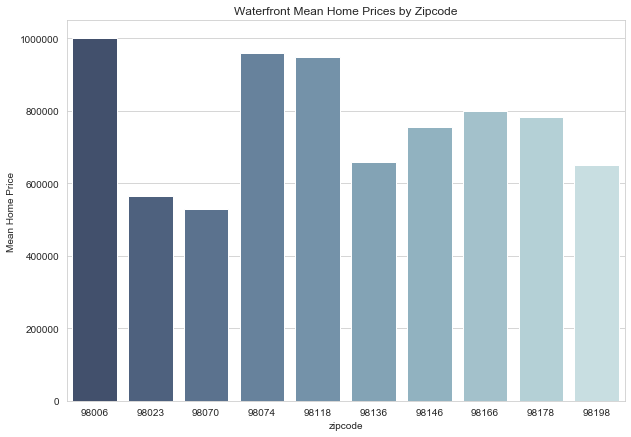

In [59]:
fig = plt.figure(figsize=(10,7))
x2 = waterfront_zipcode.zipcode
y2 = waterfront_zipcode.price
sns.barplot(x=x2, y=y2, palette=palette)
plt.title('Waterfront Mean Home Prices by Zipcode')
plt.ylabel('Mean Home Price')
plt.show()

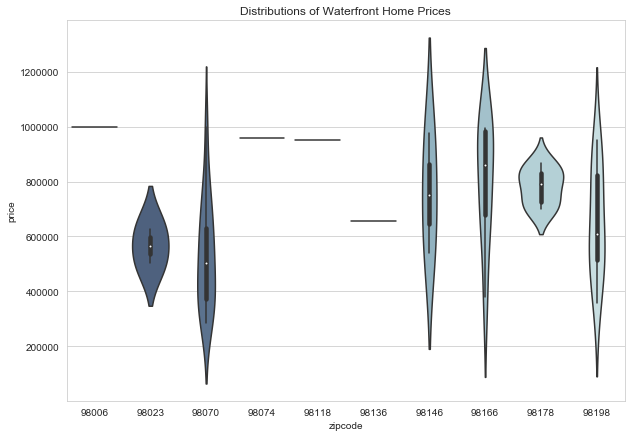

In [33]:
# Distributions of waterfront home prices by zipcode
fig = plt.figure(figsize=(10,7))
sns.violinplot(x='zipcode', y='price', data=waterfront_df, palette=palette)
plt.title('Distributions of Waterfront Home Prices')
plt.show()

In [34]:
# Let's map the waterfront homes!
# Seattle latitude and longitude values
latitude = 47.50
longitude = -122.33
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude])

# Display waterfront homes
# Create feature group
waterfront_homes = folium.map.FeatureGroup()

#loop through the homes and add each to the feature group
for lat, lng, in zip(waterfront_df.lat, waterfront_df.long):
    waterfront_homes.add_child(
    folium.features.Marker(
    [lat, lng],
    radius=5,
    fill=True,
    fill_opacity=0.6))
     
# add pop-up text to each marker on the map
latitudes = list(waterfront_df.lat)
longitudes = list(waterfront_df.long)
labels = list(waterfront_df.zipcode)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(seattle_map)

# add homes to map
seattle_map.add_child(waterfront_homes)
     
seattle_map

## Question 1 Conclusion:

The top 3 zipcodes with the highest mean home prices are: 98039, 98040 and 98006. The top 15 are plotted, and interestingly, only 2 of these zipcodes contain waterfront homes: 98006 and 98074. Looking solely at waterfront homes, the mean home prices are all over $500K. 

In contrast, the zipcodes with the lowest mean home prices are 98002, 98168 and 98032. The bottom 15 are plotted, and none of those zipcodes contain waterfront homes. 

We can conclude that waterfront homes are generally more expensive homes, but not all of the highest-priced neighborhoods contain waterfront homes. This brings up the question of which features are causing those home prices to be so high.

## Question 2: What is the impact of home and lot square footage on home price? What is the price per square foot for different zipcodes?

In [35]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
6,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
7,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
8,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
9,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000


In [36]:
# Which affects the price more? Lot or home square footage?
livingsqft_corr = np.corrcoef(df['sqft_living'], df['price'])
lotsqft_corr = np.corrcoef(df['sqft_lot'], df['price'])
print('Living Sqft:Price Correlation:', livingsqft_corr[1])
print('Lot Sqft:Price Correlation:', lotsqft_corr[1])
print('Living Square Footage has a larger effect on price.')

Living Sqft:Price Correlation: [0.60309848 1.        ]
Lot Sqft:Price Correlation: [0.09406745 1.        ]
Living Square Footage has a larger effect on price.


In [37]:
# New column price per lot sq ft
df['price_per_lotsqft'] = df['price'] / df['sqft_lot']

df['price_per_livingsqft'] = df['price'] / df['sqft_living']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_lotsqft,price_per_livingsqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,39.274336,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,74.288870,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,18.000000,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,120.800000,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,63.118812,303.571429


In [38]:
# Let's see the sq ft price of lots & living in each zipcode
df_sq_ft_price = df.groupby('zipcode')['price_per_lotsqft'].mean()
df_livsq_ft_price = df.groupby('zipcode')['price_per_livingsqft'].mean()

# Reset index and sort values from highest price to lowest
df_sq_ft_price = df_sq_ft_price.reset_index()
df_sq_ft_price = df_sq_ft_price.sort_values(by='price_per_lotsqft', ascending=False)

df_livsq_ft_price = df_livsq_ft_price.reset_index()
df_livsq_ft_price = df_livsq_ft_price.sort_values(by='price_per_livingsqft', ascending=False)

# Just see top 10 and bottom 10 zips
top_df_sq_ft_price = df_sq_ft_price.head(10)
bottom_df_sq_ft_price = df_sq_ft_price.tail(10)

top_df_livsq_ft_price = df_livsq_ft_price.head(10)
bottom_df_livsq_ft_price = df_livsq_ft_price.tail(10)

print(top_df_sq_ft_price)
print(top_df_livsq_ft_price)

    zipcode  price_per_lotsqft
41    98102         319.074025
53    98119         272.944156
47    98109         260.680057
48    98112         245.741679
45    98107         241.440997
54    98122         229.077825
42    98103         218.882618
43    98105         184.945089
59    98144         180.010812
69    98199         164.265497
    zipcode  price_per_livingsqft
24    98039            616.082000
3     98004            445.842495
47    98109            421.839114
41    98102            413.479667
53    98119            412.241082
48    98112            400.215632
43    98105            388.128961
45    98107            380.959081
42    98103            368.870253
69    98199            366.300448


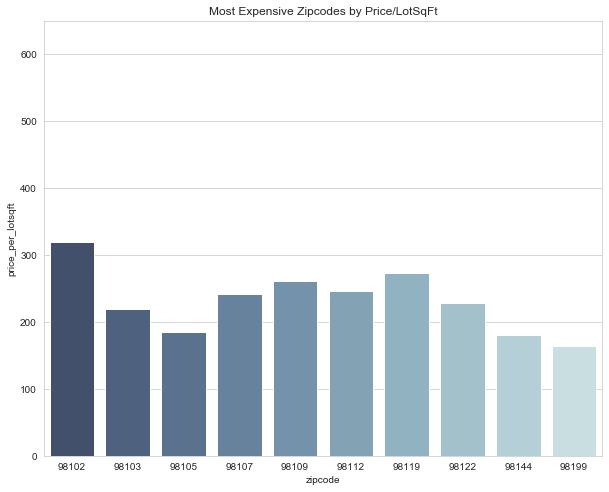

In [39]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='zipcode', y='price_per_lotsqft', data=top_df_sq_ft_price, palette=palette)
plt.title('Most Expensive Zipcodes by Price/LotSqFt')
plt.ylim(0,650)
plt.show()

In [40]:
bottom_df_sq_ft_price

,zipcode,price_per_lotsqft
0,98001,30.904078
27,98045,29.402874
20,98032,28.516430
64,98168,26.508638
12,98022,21.968290
39,98077,21.517387
8,98010,21.086372
14,98024,18.299366
10,98014,17.920968
35,98070,14.964870


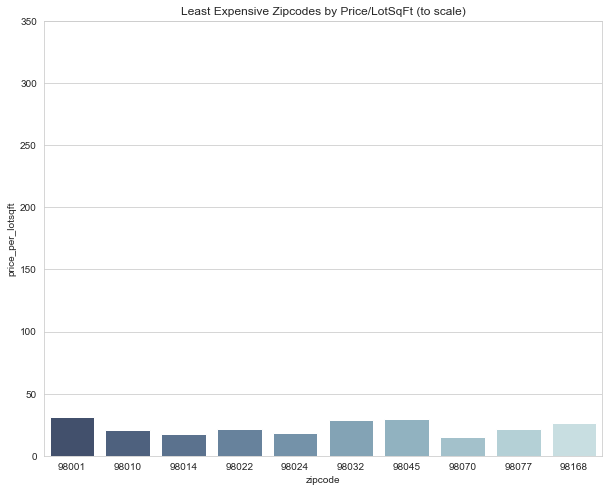

In [41]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='zipcode', y='price_per_lotsqft', data=bottom_df_sq_ft_price, palette=palette)
plt.title('Least Expensive Zipcodes by Price/LotSqFt (to scale)')
plt.ylim(0, 350)
plt.show()

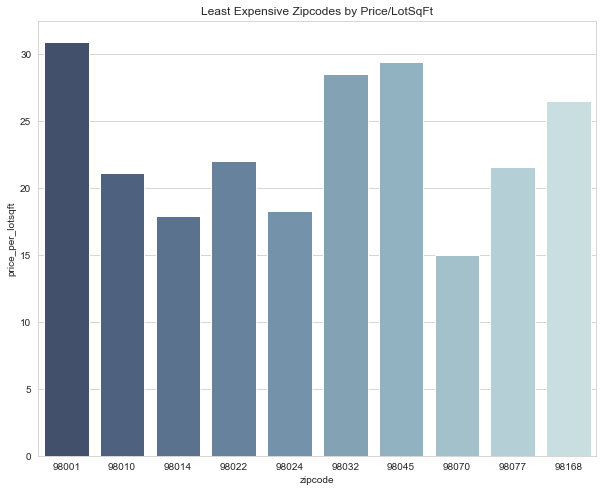

In [42]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='zipcode', y='price_per_lotsqft', data=bottom_df_sq_ft_price, palette=palette)
plt.title('Least Expensive Zipcodes by Price/LotSqFt')
plt.show()

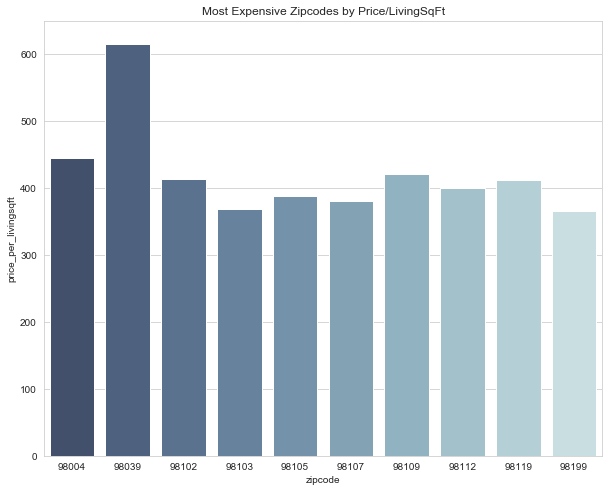

In [43]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='zipcode', y='price_per_livingsqft', data=top_df_livsq_ft_price, palette=palette)
plt.title('Most Expensive Zipcodes by Price/LivingSqFt')
plt.ylim(0,650)
plt.show()

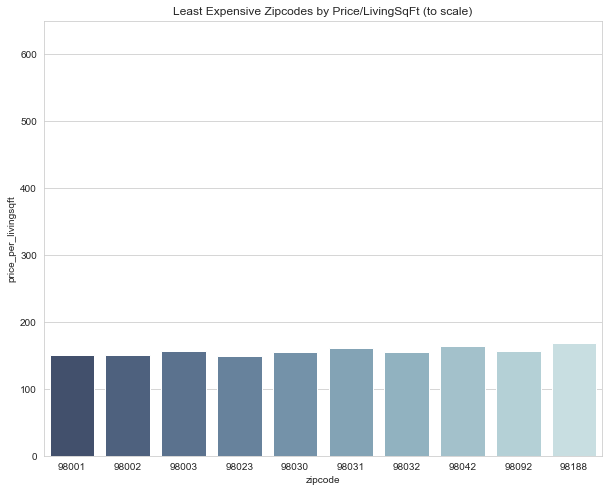

In [44]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='zipcode', y='price_per_livingsqft', data=bottom_df_livsq_ft_price, palette=palette)
plt.title('Least Expensive Zipcodes by Price/LivingSqFt (to scale)')
plt.ylim(0,650)
plt.show()

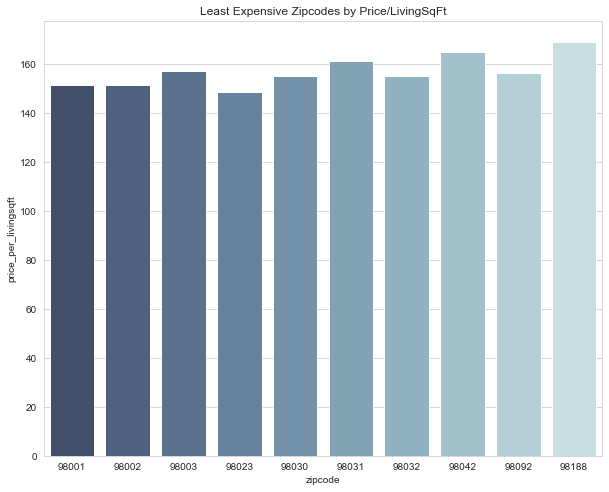

In [45]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='zipcode', y='price_per_livingsqft', data=bottom_df_livsq_ft_price, palette=palette)
plt.title('Least Expensive Zipcodes by Price/LivingSqFt')
plt.show()

In [46]:
bottom_df_livsq_ft_price

,zipcode,price_per_livingsqft
67,98188,169.007306
26,98042,164.589346
19,98031,161.101680
2,98003,157.113414
40,98092,156.014888
18,98030,155.156221
20,98032,155.020093
0,98001,151.362546
1,98002,151.306283
13,98023,148.543690


## Question 2 Conclusion:

In conclusion, when we look at the correlation coefficients, the living square footage has a bigger impact on the price than the lot square footage (0.6 and 0.09 respectively). 

Breaking this down into price per square footage for both the living space and lot space, we can rank the zipcodes by most expensive and least expensive per square foot. 

For price per lot square footage, the most expensive zipcodes are 98102, 98119, 98112, 98109 and 98107 with prices between $241-$320 per lot square foot. The least expensive zipcodes are 98070, 98014, 98024, 98010 and 98077 with prices between $14-$24 per lot square foot. Interestingly, 98070 is also a zipcode with waterfront homes. It is possible that part of this area is in a flood zone, or has a lot of run-down homes selling for renovation to explain its low land prices. 

For price per living square footage, the most expensive zipcodes are 98039, 98004 , 98109 , 98119 and 98112 with mean prices between $400-$620 per living square foot. Least expensive zipcodes are 98023, 98002, 98001, 98032 and 98030 with mean prices between $145-$155 per living square foot. The most expensive zipcodes in terms of living square footage price are similar to our findings from the first question. Interestingly, none of them are waterfront and many of them are also the most expensive in terms of land price. 

It would be interesting to dig deeper and see what makes these zipcodes so much more expensive. Based on these findings, we can conclude that the home on the lot has a big impact on its price, but the land is also expensive, so it could be the population density of these areas driving up the price of homes and land. We will explore this further in the next question. 

## Question 3: What is the effect of population density on home price?

In [47]:
# Create a DF of zipcodes and their corresponding population densities
zipcode = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 
           98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103,
           98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052,
           98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070,
           98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004,
           98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032,
           98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029,
           98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
           98106, 98072, 98188, 98014, 98055, 98039]

pop_density = [4966, 6879, 3606, 6425, 2411, 662, 3800, 4441, 5573,
               469, 5684, 7018, 9602, 6732, 141, 9905, 4423, 6279,
               3591, 892, 4741, 8638, 6667, 2908, 469, 7953, 2215,
               1717, 4323, 3580, 4604, 288, 3194, 10643, 1537, 4437,
               1725, 13594, 7895, 3977, 2361, 4428, 2185,  7523, 334,
               6841, 4714, 2024, 41, 15829, 785, 2989, 3794, 3341, 171,
               2719, 3402, 10361, 52,3696, 4330, 236, 3569, 4877, 4161,
               1231, 3062, 149, 4585, 2059] 

lists = list(zip(zipcode, pop_density)) 
pop_density_by_zip = pd.DataFrame(lists, columns = ['zipcode', 'pop_density']) 
pop_density_by_zip

,zipcode,pop_density
0,98178,4966
1,98125,6879
2,98028,3606
3,98136,6425
4,98074,2411
...,...,...
65,98072,1231
66,98188,3062
67,98014,149
68,98055,4585


In [48]:
pop_density_by_zip.to_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/dsc-phase-2-project-online/data/pop_density_by_zip.csv', index=False)

In [49]:
# Reset index to prepare for concatenation
pop_density_by_zip = pop_density_by_zip.set_index('zipcode')
pop_density_by_zip

,pop_density
zipcode,
98178,4966
98125,6879
98028,3606
98136,6425
98074,2411
...,...
98072,1231
98188,3062
98014,149


In [50]:
# Same thing on this other DF from Q2
df_livsq_ft_price = df_livsq_ft_price.set_index('zipcode')

In [51]:
# Sort index so zipcodes are in order
df_livsq_ft_price = df_livsq_ft_price.sort_index()
pop_density_by_zip = pop_density_by_zip.sort_index()
pop_density_by_zip

,pop_density
zipcode,
98001,1717
98002,4423
98003,3800
98004,3977
98005,2361
...,...
98177,3341
98178,4966
98188,3062


In [52]:
# Concatenate the DFs
pop_density_price_zip = pd.concat([df_livsq_ft_price, pop_density_by_zip], axis=1, sort=False)

In [53]:
pop_density_price_zip

,price_per_livingsqft,pop_density
zipcode,,
98001,151.362546,1717
98002,151.306283,4423
98003,157.113414,3800
98004,445.842495,3977
98005,309.321585,2361
...,...,...
98177,277.857301,3341
98178,187.375626,4966
98188,169.007306,3062


In [54]:
# Make sure we don't have any nulls and that our concat worked nicely
pop_density_price_zip.isna().sum()

price_per_livingsqft    0
pop_density             0
dtype: int64

In [55]:
# Reset the index on this DF
pop_density_price_zip = pop_density_price_zip.reset_index()

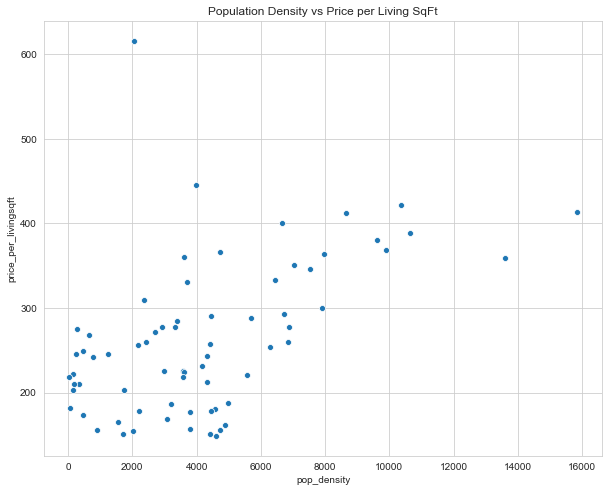

Correlation Coefficient: [0.51444205 1.        ]


In [56]:
# Plot the data
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=pop_density_price_zip,
                 x='pop_density',
                 y='price_per_livingsqft',
                palette=palette)
plt.title('Population Density vs Price per Living SqFt')
plt.show()
# Notice the somewhat positive correlation between the price per living sq ft and the population density
print('Correlation Coefficient:', np.corrcoef(pop_density_price_zip['pop_density'], pop_density_price_zip['price_per_livingsqft'])[1])

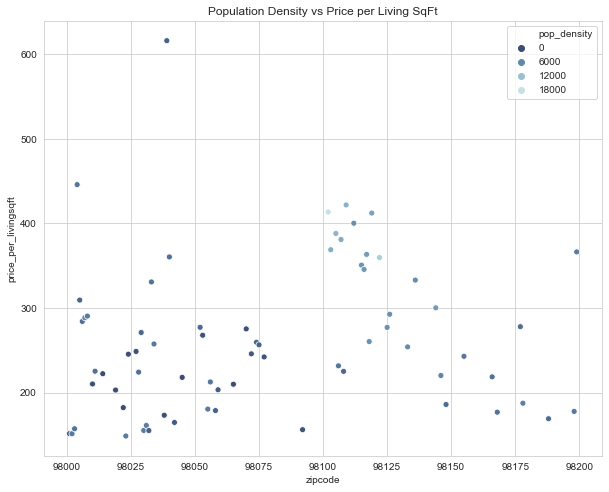

In [57]:
# Plot this so we can see the different zipcodes
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=pop_density_price_zip,
                 x='zipcode',
                 y='price_per_livingsqft',
                 hue='pop_density',
                palette=palette)
plt.title('Population Density vs Price per Living SqFt')
plt.show()

In [58]:
# Let's take a closer look at that interesting cluster of densely populated zipcodes 
most_pop_zips = pop_density_price_zip.loc[(pop_density_price_zip['zipcode'] > 98100) &
                                         (pop_density_price_zip['zipcode'] < 98125)]
most_pop_zips

,zipcode,price_per_livingsqft,pop_density
41,98102,413.479667,15829
42,98103,368.870253,9905
43,98105,388.128961,10643
44,98106,231.538367,4161
45,98107,380.959081,9602
46,98108,225.032792,2989
47,98109,421.839114,10361
48,98112,400.215632,6667
49,98115,350.672699,7018
50,98116,345.590645,7523


## Question 3 Conclusion:

In conclusion, there is a relationship between population density and price per living sqft. There is a positive correlation of about 0.5, meaning it is not a very strong correlation, but it is still a positive one. As the population density increases, so does the price per sq ft. 

When looking at the different zipcodes, we can easily see a cluster of zipcodes where there is a high population density, and also high prices per sq ft. These zipcodes are chronologically from 98102 to 98122, so we can expect that these zipcodes represent Seattle proper, and not the suburbs(98122 is actually the official city center zipcode). Of these zipcodes, 98109, 98102 and 98119 are the most expensive per sq ft, but also some of the most densely populated. The only exception is 98039, in which homes are the most expensive per sq ft, but not as densely populated as the city-center zipcodes.

Therefore, it is generally more expensive to live in the city-center, where the population is more dense. 

## Future Work:

* Dig deeper into the qualities of the homes in these areas, such as home condition and grade to see what other characteristics besides the home's location and sq footage affect the price. 
* Look at some of the characteristics of the most expensive zipcodes that are not densely populated (ex. 98039) to see what makes them so expensive. 
* Look at renovated homes vs non renovated homes built in the same year to see how much value a renovation adds.